# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_22_23.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_21_22.csv')
df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_20_21.csv')
df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_19_20.csv')

df_o = pd.concat([df1, df2, df3, df4], axis = 0)
df_o

Mounted at /content/drive


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,22/05/2022,16:00,Crystal Palace,Man United,1,0,H,1,0,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
376,E0,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
377,E0,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80
378,E0,22/05/2022,16:00,Man City,Aston Villa,3,2,H,0,1,...,3.36,-2.25,2.06,1.84,2.05,1.86,2.09,2.03,2.01,1.87


# Preprocessing

In [ ]:
# Prepare the dataset
df_o = df_o.loc[:, ['Referee','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','MaxC>2.5','AvgC>2.5','MaxCAHH','AvgCAHH','MaxCAHA','AvgCAHA', 'FTR']]
Referee_ohe_df = pd.get_dummies(df_o.iloc[:, 0], dtype=float)
FTR_df = pd.DataFrame(df_o['FTR'])
df = df_o.drop(columns=['Referee', 'FTR'])
df = pd.concat([df, Referee_ohe_df, FTR_df], axis=1)
df

,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,MaxC>2.5,AvgC>2.5,MaxCAHH,AvgCAHH,...,P Tierney,R Jones,R Madley,S Attwell,S Hooper,S Scott,T Bramall,T Harrington,T Robinson,FTR
0,5.01,3.70,1.91,4.56,3.57,1.85,2.19,2.08,2.09,2.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1,11.95,6.93,1.30,10.33,6.20,1.28,1.51,1.47,2.01,1.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D
2,4.25,3.63,2.06,3.99,3.49,2.00,2.24,2.10,1.94,1.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
3,2.50,3.55,3.18,2.43,3.36,3.02,2.09,1.96,2.14,2.08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
4,1.67,4.30,7.00,1.59,4.07,6.15,2.06,1.94,2.19,2.03,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3.01,3.65,2.64,2.81,3.49,2.53,1.84,1.80,1.88,1.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
376,1.77,4.45,4.80,1.71,4.29,4.52,1.53,1.49,1.94,1.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
377,1.17,10.90,24.00,1.14,9.22,19.12,1.39,1.34,2.19,2.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H
378,1.20,8.80,19.00,1.17,8.27,15.87,1.37,1.33,2.09,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
def get_data():
    df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_22_23.csv')
    df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_21_22.csv')
    df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_20_21.csv')
    df4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/COMP 4211 Group Project/EPL_19_20.csv')
    df_o = pd.concat([df1, df2, df3, df4], axis = 0)
    df_o

    # Prepare the dataset
    df_o = df_o.loc[:, ['Referee','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','MaxC>2.5','AvgC>2.5','MaxCAHH','AvgCAHH','MaxCAHA','AvgCAHA', 'FTR']]
    Referee_ohe_df = pd.get_dummies(df_o.iloc[:, 0], dtype=float)
    FTR_df = pd.DataFrame(df_o['FTR'])
    df = df_o.drop(columns=['Referee', 'FTR'])
    df = pd.concat([df, Referee_ohe_df, FTR_df], axis=1)
    df = df.sample(frac=1)

    # Split the data into training and testing data
    from sklearn.model_selection import train_test_split
    train_df = df.drop(columns = 'FTR')
    target = df['FTR']
    X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=4211)

    # Standardizing
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)
    return X_train, X_test, y_train, y_test

# MLP

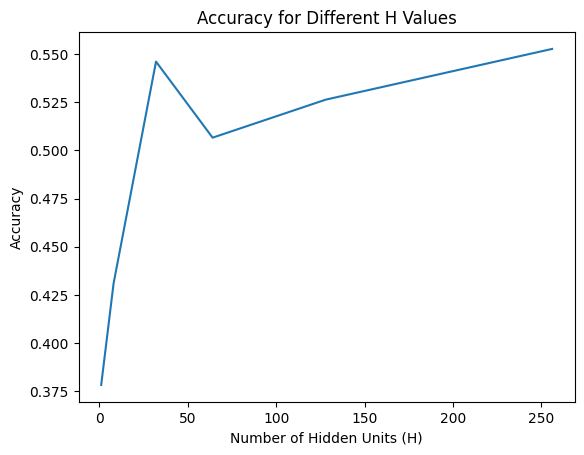

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mean_accuracy = []
H = [1, 8, 32, 64, 128, 256]

for i in H:
    X_train, X_test, y_train, y_test = get_data()
    mlp = MLPClassifier(hidden_layer_sizes=(i,i,i), early_stopping=True)
    for j in range(100):
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
    mean_accuracy.append(np.mean(accuracy_score(y_test, y_pred)))

plt.plot(H, mean_accuracy)
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different H Values')
plt.show()

Mean accuracy:  0.5059177631578947
Max accuracy:  0.5888157894736842
Min accuracy:  0.35526315789473684 

[[ 51.137   2.789  47.54 ]
 [ 25.77    1.327  42.768]
 [ 28.669   2.665 101.335]]


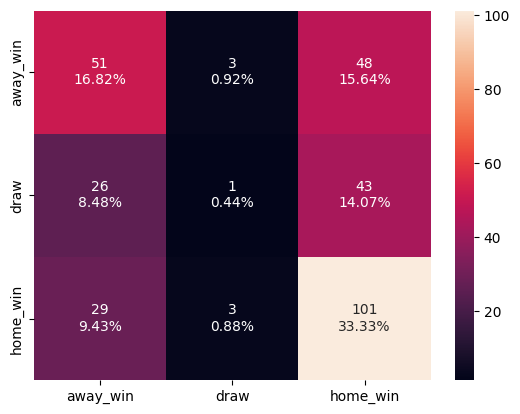

In [ ]:
acc = []
all_prob = []
all_odds = []
all_index = []
all_r = []
cf_matrix = []

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
for i in range(1000):
    X_train, X_test, y_train, y_test = get_data()
    mlp = MLPClassifier(hidden_layer_sizes=(32,32,32), early_stopping=True)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

    # simulation
    prob = mlp.predict_proba(X_test) # shape = (304,3)
    odds = sc.inverse_transform(X_test)
    odds = odds[:,5:2:-1] # shape = (304,3) AvgCA---AvgCD---AvgCH
    label = y_test
    index = label.to_numpy().reshape(-1,1) == ['A','D','H'] # shape = (304,3)
    r = np.multiply(np.multiply(prob,odds),index)
    r = np.sum(r,axis=1)
    r = r.sum()
    # record
    all_r.append(r)
    all_odds.append(odds)
    all_prob.append(prob)
    all_index.append(index)
    cf_matrix.append(confusion_matrix(y_test, y_pred))

print('Mean accuracy: ', np.mean(acc))
print('Max accuracy: ', np.max(acc))
print('Min accuracy: ', np.min(acc), '\n')
categories = ['away_win', 'draw', 'home_win']
cf_matrix = np.sum(cf_matrix, axis= 0)/1000
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, xticklabels = ['away_win', 'draw', 'home_win'], yticklabels = ['away_win', 'draw', 'home_win'], fmt='')
print(cf_matrix)

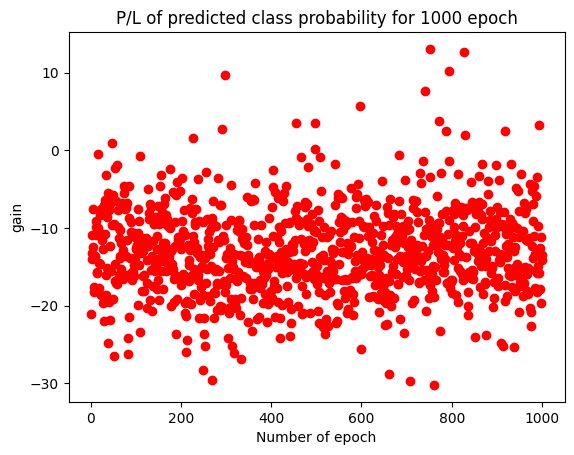

In [ ]:
gain = np.array(all_r) - 304
e=list(range(1,1001))
plt.scatter(e, gain, label='r', color='red')
plt.xlabel('Number of epoch')
plt.ylabel('gain')
plt.title('P/L of predicted class probability for 1000 epoch')
plt.show()

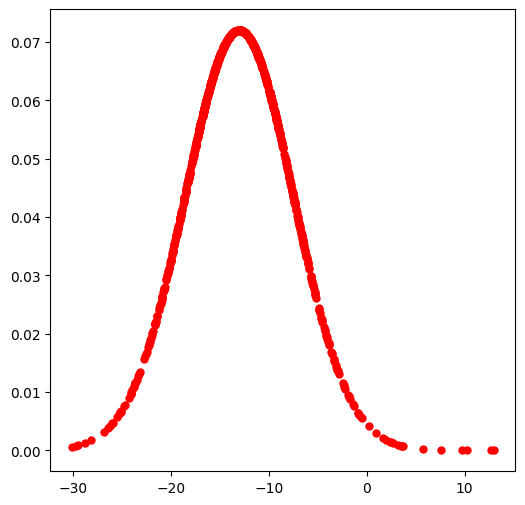

In [ ]:
# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

# To generate an array of x-values
x = gain

# To generate an array of
# y-values using corresponding x-values
y = pdf(x)

# Plotting the bell-shaped curve

plt.figure(figsize = (6, 6))
#plt.plot(x, y, color = 'black', linestyle = 'dashed')

plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis
print(np.mean(gain))
print(np.median(gain))
print(np.std(gain, ddof=1))
print(skew(gain, bias=True))
print(kurtosis(gain, bias=True))

-13.068121463417425
-13.433778837356499
5.540480802098828
0.4836533173408948
1.6488784224606636


In [ ]:
i = np.array(all_r).argmax()
best_w = all_prob[i]
rng_w = np.array(np.random.random((3,)))
rng_w = np.exp(rng_w)/np.sum(np.exp(rng_w))

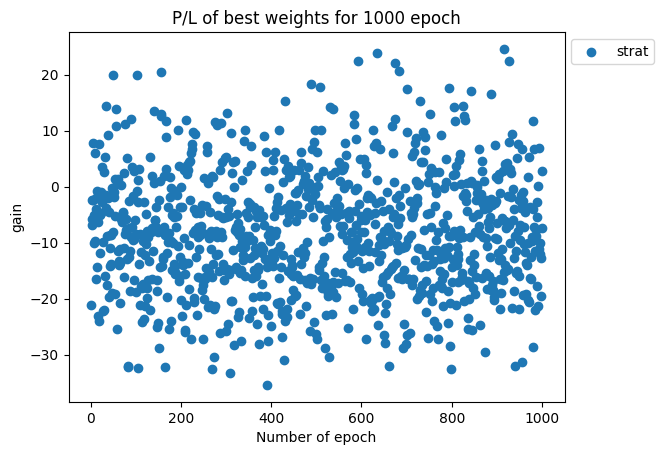

In [ ]:
all_pnl = []
rng_pnl =[]
home_pnl = []
for i in range(1000):

    # strat from model
    odds = all_odds[i]
    index = all_index[i]
    x = np.multiply(odds,index)
    #r = np.dot(np.dot(best_w,prob.T),odds)-304
    r = np.multiply(best_w,x)
    all_pnl.append(r.sum()-304)

    #random bet
    rng = np.multiply(rng_w,x)
    rng_pnl.append(rng.sum()-304)

    #all in home team
    home = np.multiply(np.array([0,0,1]),x)
    home_pnl.append(home.sum()-304)
plt.scatter(e,all_pnl,label='strat')

plt.xlabel('Number of epoch')
plt.ylabel('gain')
plt.title('P/L of best weights for 1000 epoch')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

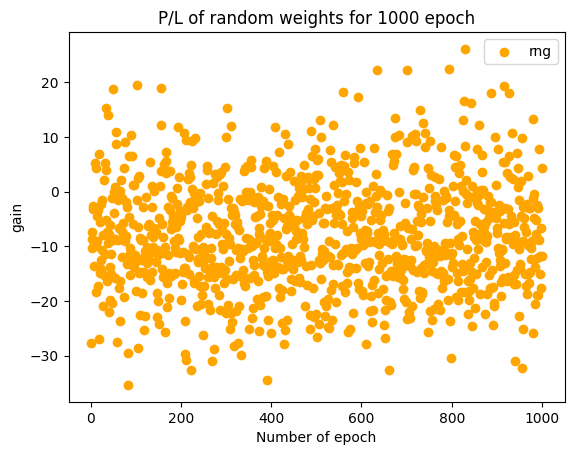

In [ ]:
plt.scatter(e,rng_pnl,label='rng', color='orange')
plt.xlabel('Number of epoch')
plt.ylabel('gain')
plt.title('P/L of random weights for 1000 epoch')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

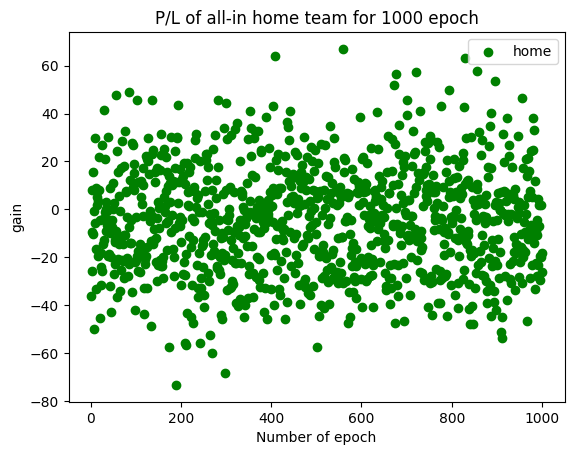

In [ ]:
plt.scatter(e,home_pnl,label='home', color='green')
plt.xlabel('Number of epoch')
plt.ylabel('gain')
plt.title('P/L of all-in home team for 1000 epoch')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

-8.240375020895298
10.461169084063382
-8.571628573441302
0.4836533173408948
1.6488784224606636
-8.099865236431638
9.802000652252417
-8.83355473848053
0.4836533173408948
1.6488784224606636
-4.577220000000003
22.042806606047243
-4.435000000000002
0.4836533173408948
1.6488784224606636


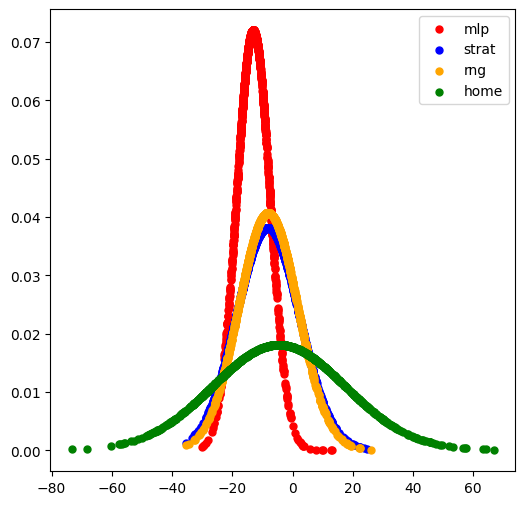

In [ ]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

#strat
a = pdf(all_pnl)
print(np.mean(all_pnl))
print(np.median(all_pnl))
print(np.std(all_pnl))
print(skew(all_pnl, bias=True))
print(kurtosis(all_pnl, bias=True))

#random
b = pdf(rng_pnl)
print(np.mean(rng_pnl))
print(np.median(rng_pnl))
print(np.std(rng_pnl))
print(skew(rng_pnl, bias=True))
print(kurtosis(rng_pnl, bias=True))

#home blind
c = pdf(home_pnl)
print(np.mean(home_pnl))
print(np.median(home_pnl))
print(np.std(home_pnl))
print(skew(home_pnl, bias=True))
print(kurtosis(home_pnl, bias=True))

# Plotting the bell-shaped curve
plt.figure(figsize = (6, 6))
plt.scatter( gain, pdf(gain), marker = 'o', s = 25, color = 'red', label='mlp')
plt.scatter( all_pnl, a, marker = 'o', s = 25, color = 'blue', label='strat')
plt.scatter( rng_pnl, b, marker = 'o', s = 25, color = 'orange', label='rng')
plt.scatter( home_pnl, c, marker = 'o', s = 25, color = 'green', label='home')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()